# Import Libraries and Dataset

In [68]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Pre-processing
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('deepseek_eng.csv')
df

conversation_id_str                      created_at  favorite_count  \
0     1886565325702885484  Mon Feb 03 23:59:58 +0000 2025               2   
1     1886565244895363321  Mon Feb 03 23:59:51 +0000 2025               0   
2     1886565274243010694  Mon Feb 03 23:59:46 +0000 2025               0   
3     1886564844779761777  Mon Feb 03 23:59:34 +0000 2025              56   
4     1886565178164301900  Mon Feb 03 23:59:23 +0000 2025               9   
...                   ...                             ...             ...   
6901  1886204231063146842  Mon Feb 03 00:05:07 +0000 2025             157   
6902  1886204196925341843  Mon Feb 03 00:04:59 +0000 2025               0   
6903  1886204159705157717  Mon Feb 03 00:04:50 +0000 2025               0   
6904  1886204107465367700  Mon Feb 03 00:04:37 +0000 2025               0   
6905  1886204082135638516  Mon Feb 03 00:04:31 +0000 2025              19   

                                              full_text               id_str  \
0      $CORZ (2025 target): 6.4x #bitcoin #hpc #IA #...  1886565325702885484   
1     What are your thoughts on this matter? Do you ...  1886565292697862457   
2     Geopolitical Disruptions YOU Missed Last week ...  1886565274243010694   
3     Each new generation of AGI lab technical found...  1886565225060819207   
4     Crazy! Google Interest Last 7 Days - Worldwide...  1886565178164301900   
...                                                 ...                  ...   
6901  @OpenAI's deep research is a significant miles...  1886204231063146842   
6902   @nvidia -17% after DeepSeek news (9th worst d...  1886204196925341843   
6903  DeepSeek skyrocketed despite controversy over ...  1886204159705157717   
6904  So Deep Research from @OpenAI is their respons...  1886204107465367700   
6905                   Ai chips https://t.co/O6mHcLNUvo  1886204082135638516   

                                            image_url in_reply_to_screen_name  \
0                                                 NaN                     NaN   
1                                                 NaN                CyCoderX   
2     https://pbs.twimg.com/media/Gi5s9QxWEAAdH9F.jpg                     NaN   
3                                                 NaN            teortaxesTex   
4     https://pbs.twimg.com/media/Gi5s1EEXUAE-h8w.jpg                     NaN   
...                                               ...                     ...   
6901                                              NaN                  OpenAI   
6902                                              NaN                     NaN   
6903  https://pbs.twimg.com/media/Gi0kroVWMAAte_h.jpg                     NaN   
6904  https://pbs.twimg.com/media/Gi0kdtQasAAo8WU.jpg                     NaN   
6905  https://pbs.twimg.com/media/Gi0knKiWwAAsVyf.jpg                     NaN   

     lang           location  quote_count  reply_count  retweet_count  \
0      en             Monaco            0            2              0   
1      en                NaN            0            0              0   
2      en                NaN            0            0              0   
3      en                NaN            0            7              1   
4      en                NaN            0            1              1   
...   ...                ...          ...          ...            ...   
6901   en  San Francisco, CA            2            6             17   
6902   en                NaN            0            0              0   
6903   en                NaN            0            0              0   
6904   en              日本 東京            0            0              0   
6905   en           The Grid            0            2              1   

                                              tweet_url          user_id_str  \
0     https://x.com/singles_stories/status/188656532...  1034590996624039936   
1     https://x.com/CyCoderX/status/1886565292697862457  1860376765182398464   
2     https://x.com/abishurpra

# Exploratory Data Analysis (EDA)

## The Columns of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      6906 non-null   int64 
 1   created_at               6906 non-null   object
 2   favorite_count           6906 non-null   int64 
 3   full_text                6906 non-null   object
 4   id_str                   6906 non-null   int64 
 5   image_url                1518 non-null   object
 6   in_reply_to_screen_name  3011 non-null   object
 7   lang                     6906 non-null   object
 8   location                 4285 non-null   object
 9   quote_count              6906 non-null   int64 
 10  reply_count              6906 non-null   int64 
 11  retweet_count            6906 non-null   int64 
 12  tweet_url                6906 non-null   object
 13  user_id_str              6906 non-null   int64 
 14  username                 6906 non-null  

## Word Cloud

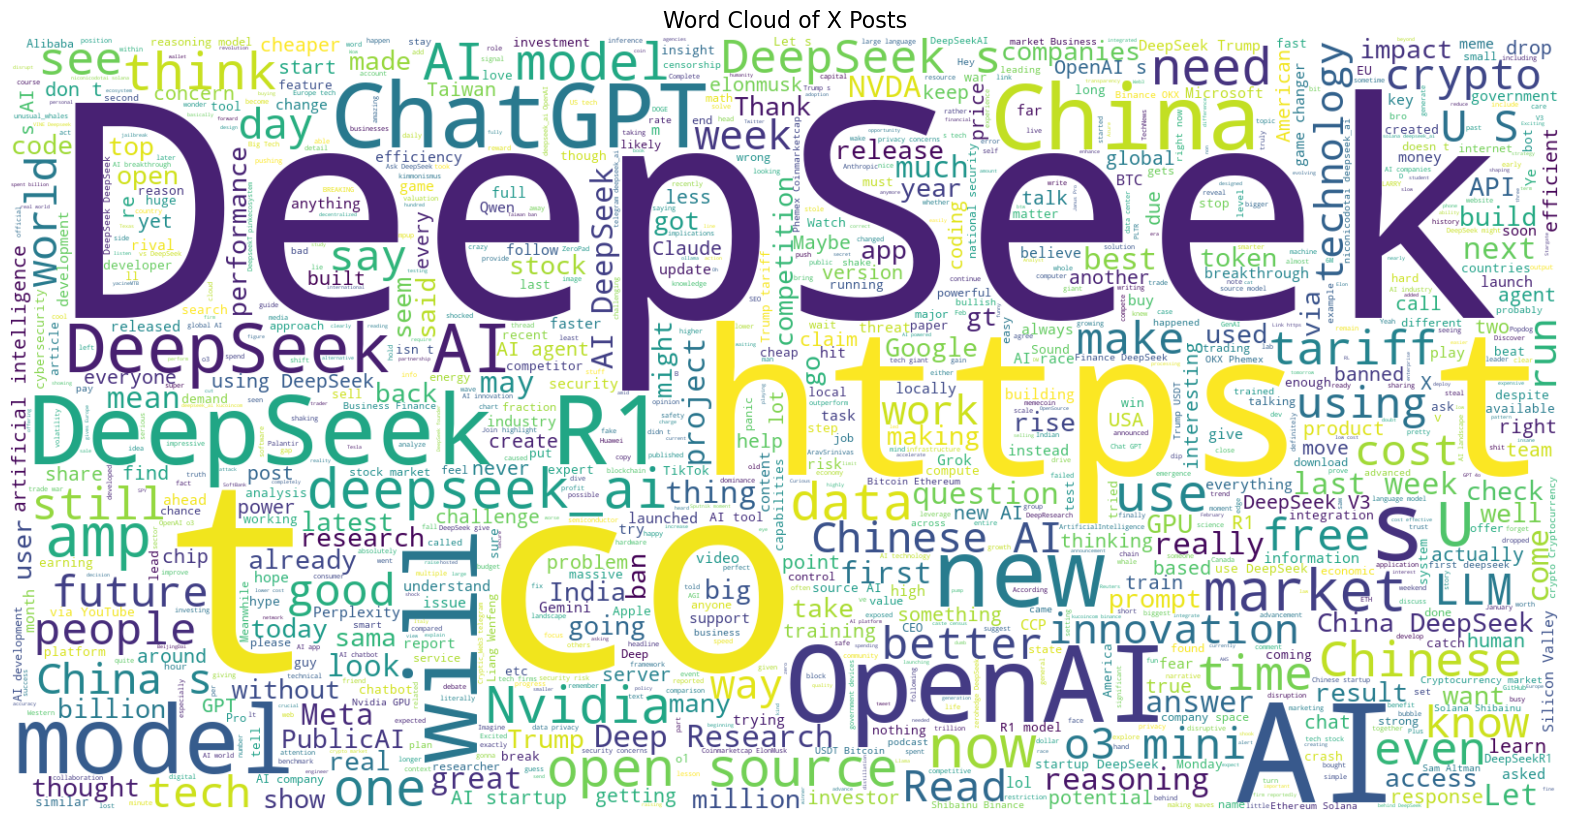

In [8]:
text = ' '.join(df['full_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(text)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of X Posts", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Data Pre-processing

## Select Only the full_text Column

In [10]:
df_cp = df.copy()

df_cp = df_cp[['full_text']]
df_cp

full_text
0      $CORZ (2025 target): 6.4x #bitcoin #hpc #IA #...
1     What are your thoughts on this matter? Do you ...
2     Geopolitical Disruptions YOU Missed Last week ...
3     Each new generation of AGI lab technical found...
4     Crazy! Google Interest Last 7 Days - Worldwide...
...                                                 ...
6901  @OpenAI's deep research is a significant miles...
6902   @nvidia -17% after DeepSeek news (9th worst d...
6903  DeepSeek skyrocketed despite controversy over ...
6904  So Deep Research from @OpenAI is their respons...
6905                   Ai chips https://t.co/O6mHcLNUvo

[6906 rows x 1 columns]

## Check Data Type

In [12]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  6906 non-null   object
dtypes: object(1)
memory usage: 54.1+ KB


## Check Missing Value

In [14]:
df_cp.isnull().sum()

full_text    0
dtype: int64

## Check Duplicate Value

In [16]:
df_cp.duplicated().sum()

25

In [18]:
df_cp[df_cp.duplicated]

full_text
560   DeepSeek: The Chinese AI Startup Challenging O...
827   3/3 The biggest shift? DeepSeek R1 is open-sou...
828   2/3 DeepSeek R1 excels in coding tasks outperf...
922   @ruudpeys @Equinix Advances in #AI #cloudcompu...
1489  i installed @deepseek_ai using #ollama standal...
1540  @zerohedge DeepSeek AI for $30? At this rate I...
2111  CITING U.S. CONCERNS ABOUT HUAWEI TIKTOK DEEPS...
2127  @DeFi_Astral @Dmailofficial @deepseek_ai Congr...
2521    USA - ChatGPT China - DeepSeeK India - CasteGPT
3157  @garlic_deepseek @elonmusk @CryptoLWJ What the...
3349  Analyst says R1 development costs were $2.6B 4...
3449  OpenAI says DEEPSEEK may have improperly harve...
3489  TSMC Shares in Focus on Return From Holiday Af...
3743           @niconicodotai @solana @deepseek_ai done
3951  @deepseek_ai Hello Deepseek team. I participat...
4159  @kwantxbt Please provide TA for $DEEPSEEK H2gf...
4488           @niconicodotai @deepseek_ai @OpenAI Nice
4553                   There comes the DeepSeek threads
4559  @SuiAIFun @SUAI on @SuiNetwork is amazing. #AI...
4625  @deepseek_ai Disappointingly DeepSeek R1 does ...
5300                  @niconicodotai @deepseek_ai Great
5862                  @niconicodotai @deepseek_ai Great
6418             @DeepSeek_solai Please follow me back 
6601                               @mogcoin I shall Mog
6886  Crypto mining stocks extend losses tech stocks...

In [20]:
df_cp.drop_duplicates(inplace = True)
df_cp.duplicated().sum()

0

## Clean Text

In [24]:
def clean(Text):
    text = re.sub(r'@\w+', '', Text) # mention
    text = re.sub(r'\b(?:https?://|www\.)\S+\b', '', text) # url
    text = re.sub(r'#\w+', '', text) # hastag
    text = re.sub(r'\s+', ' ', text).strip() # space
    return text

df_cp["clean_text"] = df_cp["full_text"].apply(clean)
df_cp.head()

full_text  \
0   $CORZ (2025 target): 6.4x #bitcoin #hpc #IA #...   
1  What are your thoughts on this matter? Do you ...   
2  Geopolitical Disruptions YOU Missed Last week ...   
3  Each new generation of AGI lab technical found...   
4  Crazy! Google Interest Last 7 Days - Worldwide...   

                                          clean_text  
0  $CORZ (2025 target): 6.4x $mara $riot $clsk $s...  
1  What are your thoughts on this matter? Do you ...  
2  Geopolitical Disruptions YOU Missed Last week ...  
3  Each new generation of AGI lab technical found...  
4  Crazy! Google Interest Last 7 Days - Worldwide...

# Vader

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...


True

In [37]:
sia = SentimentIntensityAnalyzer()

def sentiment_vader(text):
    compound_polarity = sia.polarity_scores(text)
    
    if compound_polarity['compound'] >= 0.05:
        return 'Positive'
    elif compound_polarity['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [39]:
df_cp['Label'] = df_cp['clean_text'].apply(lambda text: sentiment_vader(text))
df_cp

full_text  \
0      $CORZ (2025 target): 6.4x #bitcoin #hpc #IA #...   
1     What are your thoughts on this matter? Do you ...   
2     Geopolitical Disruptions YOU Missed Last week ...   
3     Each new generation of AGI lab technical found...   
4     Crazy! Google Interest Last 7 Days - Worldwide...   
...                                                 ...   
6901  @OpenAI's deep research is a significant miles...   
6902   @nvidia -17% after DeepSeek news (9th worst d...   
6903  DeepSeek skyrocketed despite controversy over ...   
6904  So Deep Research from @OpenAI is their respons...   
6905                   Ai chips https://t.co/O6mHcLNUvo   

                                             clean_text     Label  
0     $CORZ (2025 target): 6.4x $mara $riot $clsk $s...   Neutral  
1     What are your thoughts on this matter? Do you ...  Positive  
2     Geopolitical Disruptions YOU Missed Last week ...  Negative  
3     Each new generation of AGI lab technical found...  Positive  
4     Crazy! Google Interest Last 7 Days - Worldwide...  Positive  
...                                                 ...       ...  
6901  's deep research is a significant milestone: A...  Positive  
6902  -17% after DeepSeek news (9th worst drop ever)...  Positive  
6903  DeepSeek skyrocketed despite controversy over ...  Positive  
6904  So Deep Research from is their response to Dee...   Neutral  
6905                                           Ai chips   Neutral  

[6881 rows x 3 columns]

In [41]:
df_cp.to_csv("result.csv")

# Exploratory Data Analysis (EDA) for New Dataset

## Label Composition

In [47]:
label = df_cp['Label']

label_counts = label.value_counts().sort_values(ascending=False)
label_counts

Label
Positive    3393
Neutral     1823
Negative    1665
Name: count, dtype: int64

In [49]:
# create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# add title
plt.title('Pie chart of label')

# show the plot
plt.show()

## Word Cloud of Each Label

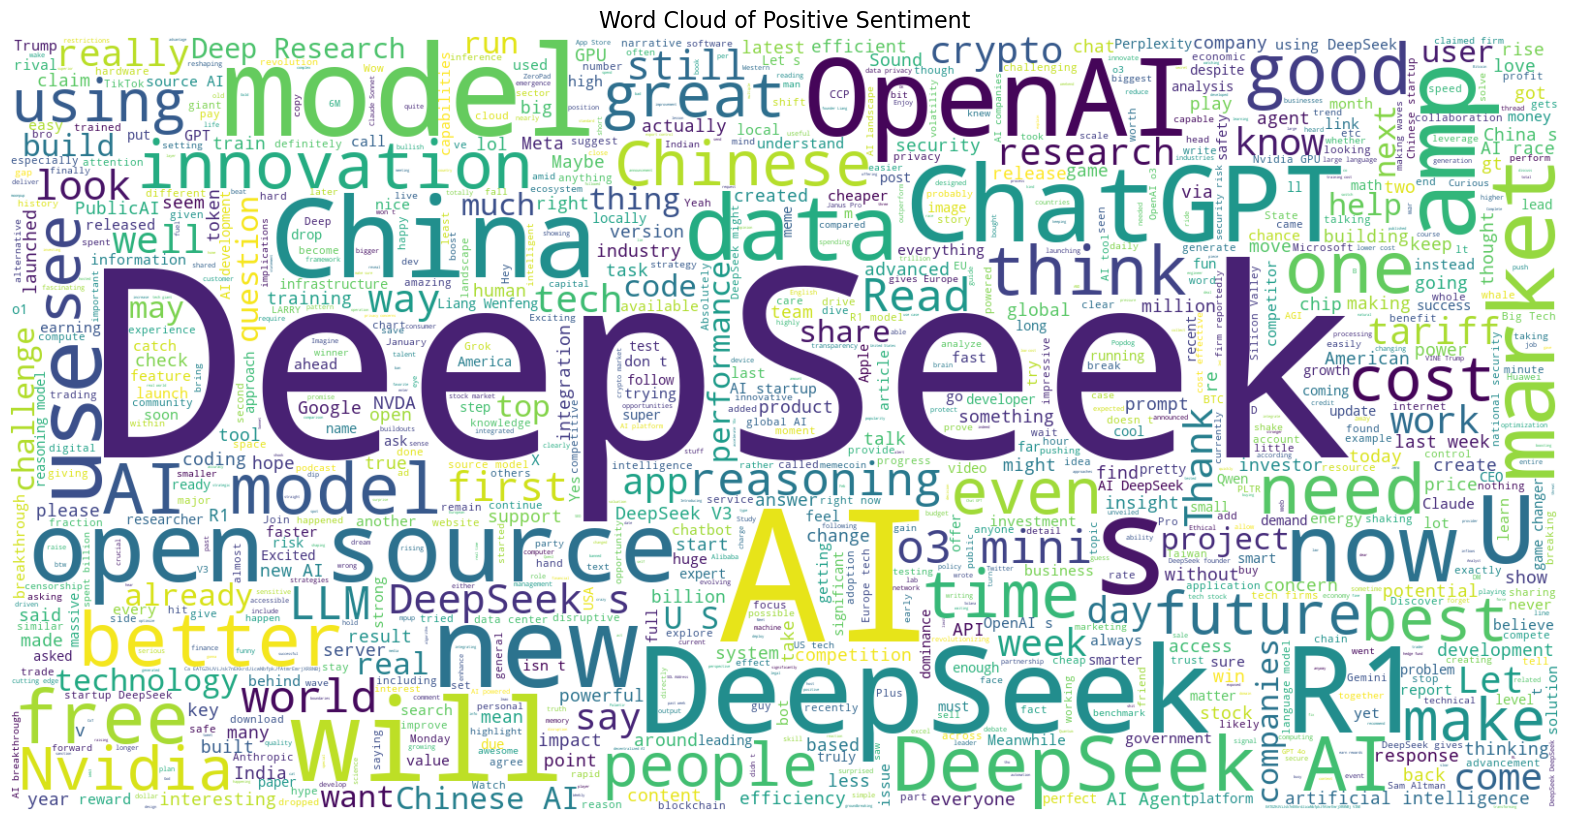

In [52]:
df_pos = df_cp[df_cp['Label'] == 'Positive']
df_pos = ' '.join(df_pos['clean_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_pos)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Positive Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

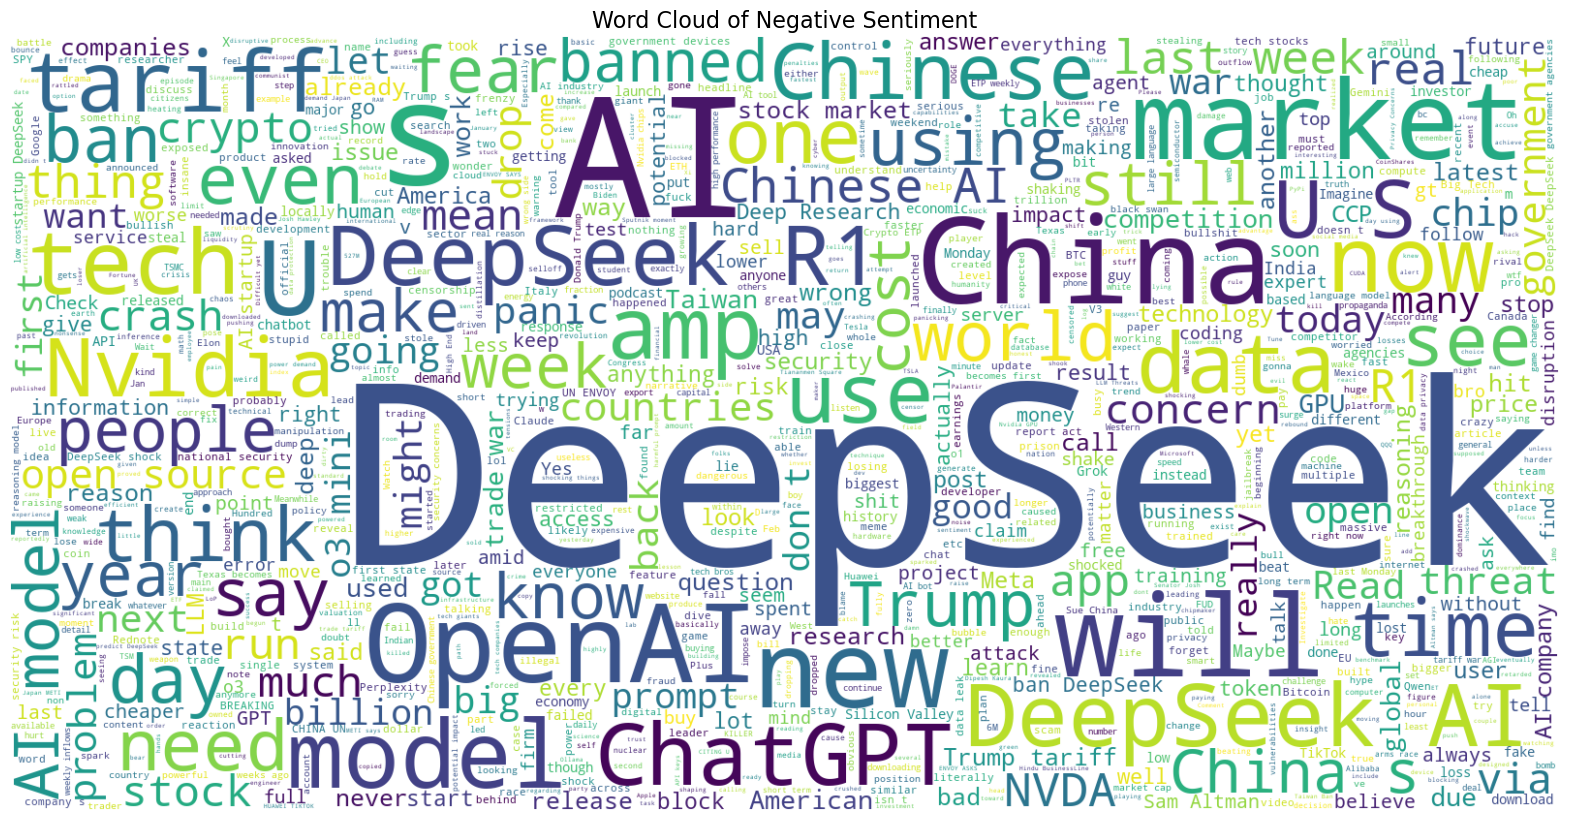

In [64]:
df_neg = df_cp[df_cp['Label'] == 'Negative']
df_neg = ' '.join(df_neg['clean_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_neg)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Negative Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

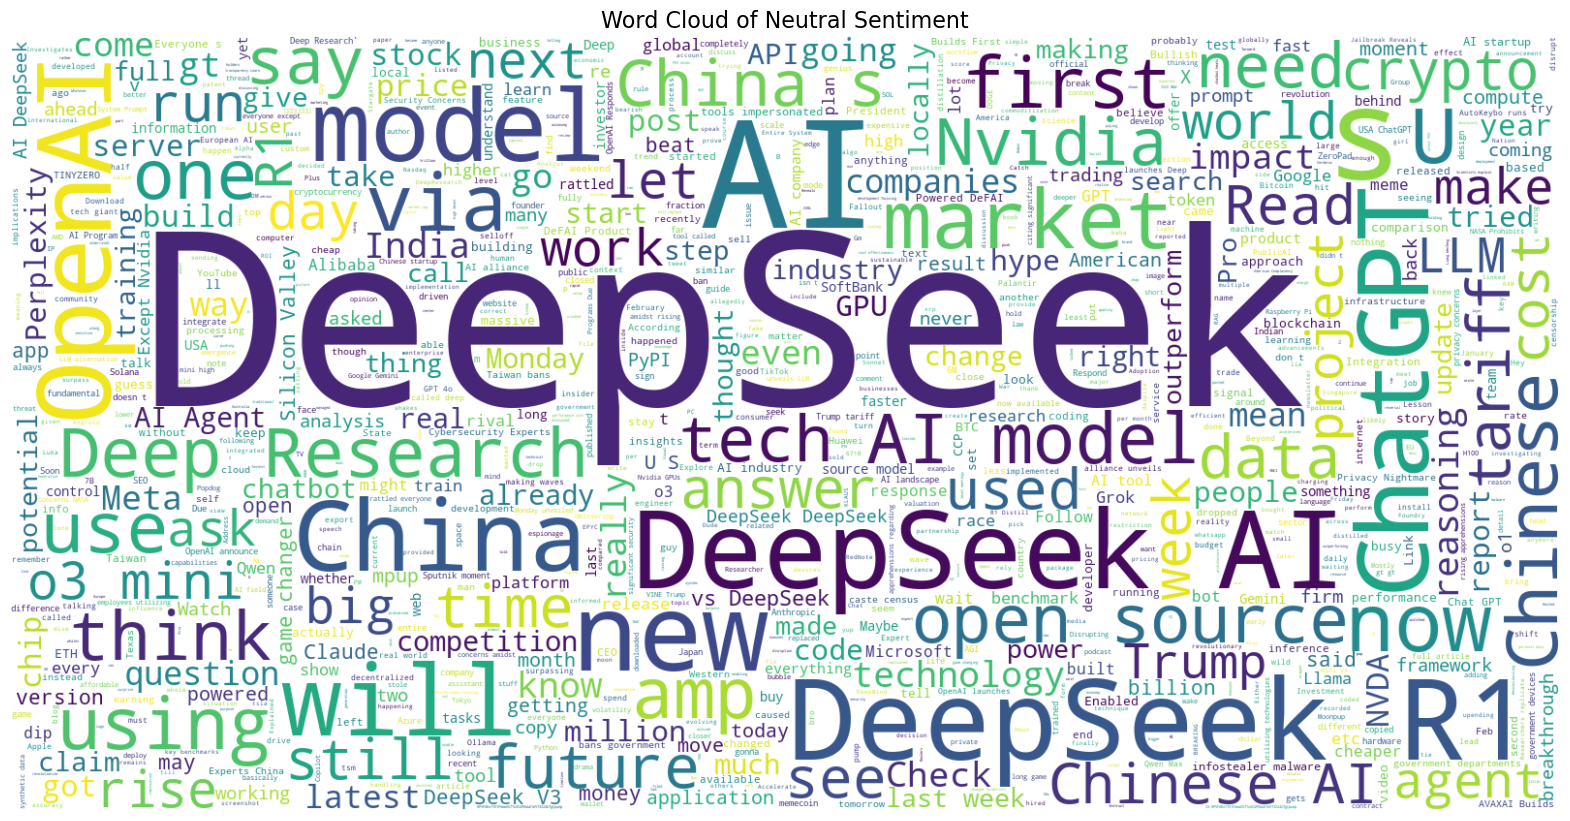

In [65]:
df_neu = df_cp[df_cp['Label'] == 'Neutral']
df_neu = ' '.join(df_neu['clean_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_neu)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Neutral Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()